<a href="https://colab.research.google.com/github/sydoky/SciKit_8Steps/blob/main/SciKitLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
heart_disease = pd.read_csv('/content/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
X=heart_disease.drop("target", axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [4]:
y=heart_disease["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.20)

In [6]:
len(X_train)

242

In [7]:
len(y_test)

61

In [8]:
#Choose the model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [9]:
clf.fit(X_train, y_train) # fit model  is applying the model on my data (the model = RandomForestClassifier)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
clf.score(X_test, y_test) #we are making prediction, 75%

0.8524590163934426

In [11]:
clf.score(X_train, y_train) #100%, The model is trained to give a 100% prediction 

1.0

In [12]:
y_preds=clf.predict(X_test)

In [13]:
y_preds

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1])

In [14]:
y_test

282    0
58     1
195    0
35     1
5      1
      ..
70     1
238    0
200    0
97     1
43     1
Name: target, Length: 61, dtype: int64

In [15]:
#Evaluate the model
clf.score(X_test, y_test)

0.8524590163934426

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        22
           1       0.92      0.85      0.88        39

    accuracy                           0.85        61
   macro avg       0.84      0.85      0.84        61
weighted avg       0.86      0.85      0.85        61



In [17]:
conf_matrix=confusion_matrix(y_test, y_preds)

In [18]:
conf_matrix

array([[19,  3],
       [ 6, 33]])

In [19]:
accuracy_score(y_test, y_preds)

0.8524590163934426

In [20]:
np.random.seed(42) #42 is a random number for convention but it can be a different number 
for i in range(10,100,10):
  print("Trying model with {} estimators".format(i))

  model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train) #n_estimator is like a medicine (parameter) that will boost my model 
  print("Model accuracy on test set: {}%".format(model.score(X_test, y_test)*100))

Trying model with 10 estimators
Model accuracy on test set: 83.60655737704919%
Trying model with 20 estimators
Model accuracy on test set: 80.32786885245902%
Trying model with 30 estimators
Model accuracy on test set: 81.9672131147541%
Trying model with 40 estimators
Model accuracy on test set: 83.60655737704919%
Trying model with 50 estimators
Model accuracy on test set: 85.24590163934425%
Trying model with 60 estimators
Model accuracy on test set: 85.24590163934425%
Trying model with 70 estimators
Model accuracy on test set: 85.24590163934425%
Trying model with 80 estimators
Model accuracy on test set: 83.60655737704919%
Trying model with 90 estimators
Model accuracy on test set: 85.24590163934425%


In [21]:
import pickle
pickle.dump(model,open("Randomforestmodel.pkl","wb"))

In [22]:
loaded_model=pickle.load(open("Randomforestmodel.pkl","rb"))
loaded_model.score(X_test,y_test)

0.8524590163934426

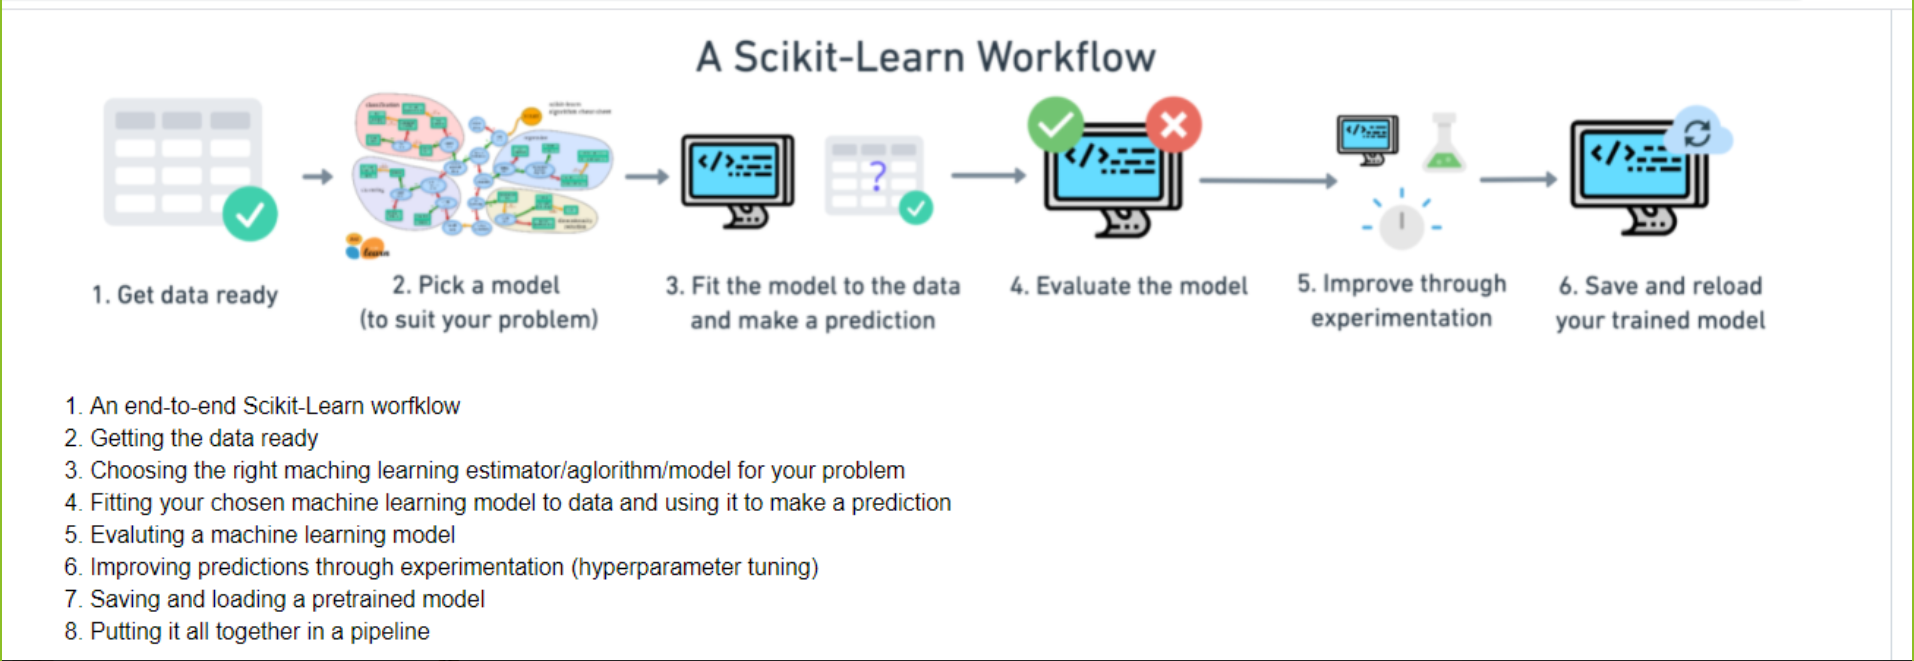